# Breast Cancer Classification

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Loading breast cancer data from scikit learn datasets

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Checking the loaded data to find the details

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

There are many feautures. Understanding the relation is very important.

In [4]:
df1 = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df2 = pd.DataFrame(cancer.target, columns = ['target'])

## Knowing the data

Exploring the data to get the basic idea. To also find if there are any false or null values to work on

In [5]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


There are too many number of features. It is very difficult to find the relationship between the features by scatter plot.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df2['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

It is a binary classification with unequal distributions.

## Plotting the data

There are 30 features in total and some of them are derived from other. It is very difficult to plot the data and understand the relation directly. Therefore using heatmap before.

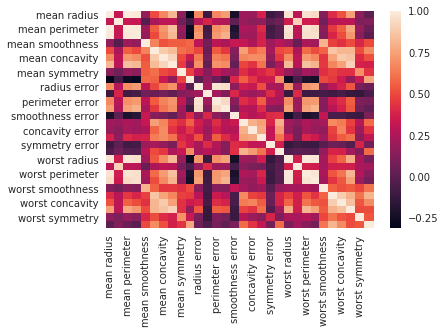

In [9]:
sns.set()
sns.heatmap(df1.corr())
plt.show()

Highly correlated features can be observed clearly.

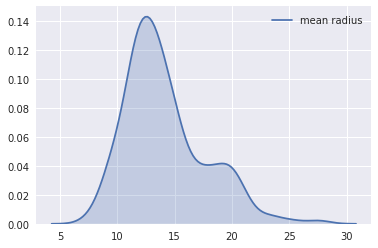

In [10]:
sns.kdeplot(df1['mean radius'], shade = True)

## Splitting the data into training, cross validation and testing dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, train_size = 0.6,test_size = 0.4, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size = 0.5, test_size = 0.5, random_state = 1)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(341, 30) (341, 1)
(114, 30) (114, 1)
(114, 30) (114, 1)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

The data is scaled to make it more evenly distributed.

## Training and Testing (Different Models)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train.values.ravel())

knn_score = knn.score(X_val, y_val)

In [14]:
from sklearn import svm
svc = svm.SVC(C = 1000, gamma = 'scale')
svc.fit(X_train,y_train.values.ravel())

svm_score = svc.score(X_val, y_val)

In [15]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train,y_train.values.ravel())

rfc_score = rfc.score(X_val, y_val)

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

mlp_score = mlp.score(X_val, y_val)

In [17]:
models = pd.DataFrame({'Model': ['KNN','SVC','Random Forest','MLP'],
    'Score': [knn_score, svm_score, rfc_score, mlp_score]})
print(models.sort_values(by ='Score', ascending = False))

           Model     Score
1            SVC  0.973684
3            MLP  0.973684
0            KNN  0.956140
2  Random Forest  0.947368


Now SVC and MLP will be studied in detail.

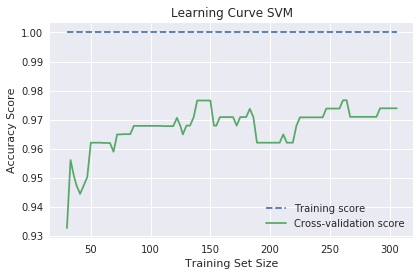

In [18]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C = 1000, gamma = 'scale'), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

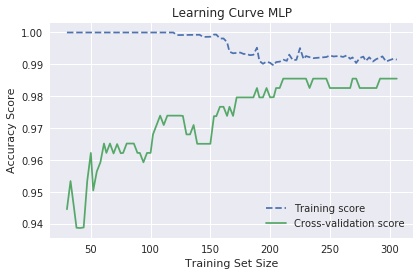

In [19]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42), 
                                                        X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1,
                                                        train_sizes=np.linspace(0.1,1, 100))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--',  label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.title("Learning Curve MLP")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Final Step

While training with SVM there is slight chance that the model is over fitting the data. The curve with MLP is more accurate theoretically.

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=[10],max_iter=2000, random_state=42)
mlp.fit(X_train, y_train.values.ravel())

mlp_score = mlp.score(X_test, y_test)
print(mlp_score*100)

95.6140350877193


There is a fall in accuracy to 95.6% when test data was used, from 97.3% on validation set. It is a very good real life example.

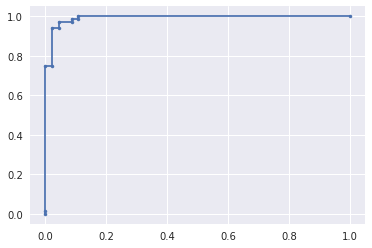

Accuracy of ROC: 0.992


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = mlp.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.')
plt.show()

print('Accuracy of ROC: %.3f' % auc)

This ROC score is quite good. Which means our model is tuned properly although it is not giving high scores on testing set.